<a href="https://colab.research.google.com/github/Donyicoder2006/Neural-Networks/blob/main/Cat_And_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/;
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
dog-and-cat-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip dog-and-cat-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5499.jpg  
  inflating: PetImages/Dog/55.jpg    
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   

In [ ]:
import os
import shutil
import random

# Define the base directory for the organized dataset
base_dir = 'organized_dataset'

# Create the base directory and subdirectories
os.makedirs(os.path.join(base_dir, 'training_set', 'cats'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'training_set', 'dogs'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'test_set', 'cats'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'test_set', 'dogs'), exist_ok=True)

# Define the source directories for the unzipped images
cat_source_dir = 'PetImages/Cat'
dog_source_dir = 'PetImages/Dog'

# Get the list of image files
cat_files = [f for f in os.listdir(cat_source_dir) if os.path.isfile(os.path.join(cat_source_dir, f))]
dog_files = [f for f in os.listdir(dog_source_dir) if os.path.isfile(os.path.join(dog_source_dir, f))]

# Shuffle the file lists
random.shuffle(cat_files)
random.shuffle(dog_files)

# Define the split ratio (80% training, 20% testing)
train_split_ratio = 0.8

# Calculate the number of files for training and testing
num_cat_train = int(len(cat_files) * train_split_ratio)
num_dog_train = int(len(dog_files) * train_split_ratio)

# Split the files into training and testing sets
cat_train_files = cat_files[:num_cat_train]
cat_test_files = cat_files[num_cat_train:]
dog_train_files = dog_files[:num_dog_train]
dog_test_files = dog_files[num_dog_train:]

# Move the files to the organized directories
for f in cat_train_files:
    src_path = os.path.join(cat_source_dir, f)
    dst_path = os.path.join(base_dir, 'training_set', 'cats', f)
    shutil.move(src_path, dst_path)

for f in cat_test_files:
    src_path = os.path.join(cat_source_dir, f)
    dst_path = os.path.join(base_dir, 'test_set', 'cats', f)
    shutil.move(src_path, dst_path)

for f in dog_train_files:
    src_path = os.path.join(dog_source_dir, f)
    dst_path = os.path.join(base_dir, 'training_set', 'dogs', f)
    shutil.move(src_path, dst_path)

for f in dog_test_files:
    src_path = os.path.join(dog_source_dir, f)
    dst_path = os.path.join(base_dir, 'test_set', 'dogs', f)
    shutil.move(src_path, dst_path)

print("Dataset organized successfully.")

Dataset organized successfully.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
# Define image dimensions
img_width, img_height = 150, 150

# Define batch size and epochs
batch_size = 32
epochs = 10

# Define data directories
train_data_dir = 'organized_dataset/training_set'
validation_data_dir = 'organized_dataset/test_set'

In [ ]:
# Create ImageDataGenerator for training set with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create ImageDataGenerator for test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Create the testing data generator
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 24997 images belonging to 2 classes.
Found 18497 images belonging to 2 classes.


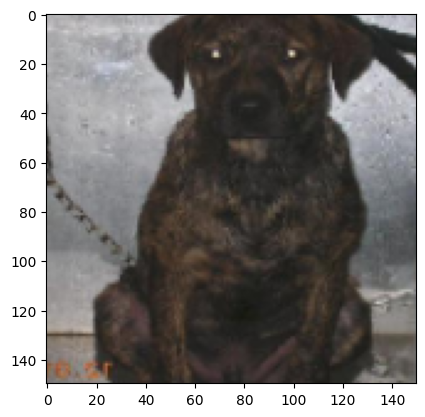

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_generator[0][0][0])

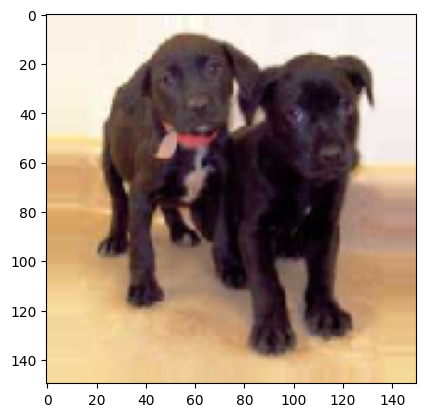

In [ ]:
plt.imshow(train_generator[2][0][0])

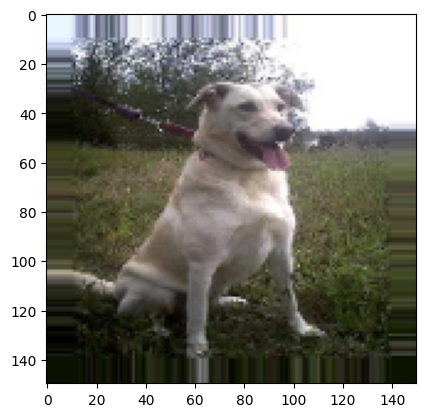

In [ ]:
plt.imshow(train_generator[100][0][0])

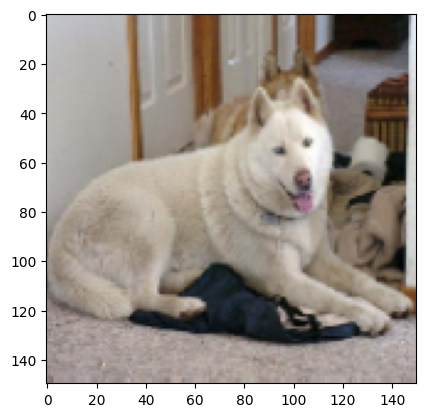

In [ ]:
plt.imshow(train_generator[300][0][0])

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model = Sequential([
    Conv2D(16, (4, 4), padding='same', activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid'),
    BatchNormalization(),

    Conv2D(16, (4, 4), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid'),
    BatchNormalization(),

    Conv2D(36, (4, 4), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid'),
    BatchNormalization(),

    Flatten(),

    Dense(16, activation='selu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(16, activation='selu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(8, activation='selu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 75, 75, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 36)     │         9,252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 37, 37, 36)     │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       331,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │           612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 36)             │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         2,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 36)             │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 385,821 (1.47 MB)

 Trainable params: 385,253 (1.47 MB)

 Non-trainable params: 568 (2.22 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping],
    validation_split=0.2 # This parameter is used with data arrays, not generators.
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
500/781 ━━━━━━━━━━━━━━━━━━━━ 57s 205ms/step - accuracy: 0.6138 - loss: 0.6827

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


781/781 ━━━━━━━━━━━━━━━━━━━━ 214s 255ms/step - accuracy: 0.6285 - loss: 0.6630 - val_accuracy: 0.7246 - val_loss: 0.5449
Epoch 2/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.5938 - loss: 0.7362

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5938 - loss: 0.7362 - val_accuracy: 0.7234 - val_loss: 0.5482
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.7350 - loss: 0.5342